<a href="https://colab.research.google.com/github/AndrewArnett/DS-Unit-1-Build/blob/master/Ramen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
uploaded = files.upload()

Saving datasets_9366_13206_ramen-ratings.csv to datasets_9366_13206_ramen-ratings (2).csv


In [35]:
df = pd.read_csv(io.StringIO(uploaded['datasets_9366_13206_ramen-ratings.csv'].decode('utf-8')))

print(df.shape)
df.head()

(2580, 7)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [36]:
rating = df.drop(['Review #', 'Brand', 'Variety', 'Style', 'Top Ten'], axis=1)

rating.head()

,Country,Stars
0,Japan,3.75
1,Taiwan,1
2,USA,2.25
3,Taiwan,2.75
4,India,3.75


In [37]:
rating['Stars'].value_counts()

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
1           26
0           26
2.25        21
0.5         14
0.25        11
1.25        10
5.0         10
3.50         9
5.00         7
4.00         6
4.3          4
Unrated      3
4.50         3
3.8          3
4.0          3
3.0          2
2.3          2
3.1          2
4.125        2
2.9          2
1.1          2
2.8          2
3.2          1
0.1          1
3.3          1
2.1          1
3.00         1
2.85         1
3.125        1
3.7          1
0.9          1
3.4          1
2.125        1
3.65         1
0.75         1
3.6          1
1.8          1
Name: Stars, dtype: int64

In [7]:
df1 = rating.replace({'Unrated': np.NaN})

print(df1.shape)

(2580, 2)


In [8]:
df1[['Stars']] = df1[['Stars']].apply(pd.to_numeric)

df1.dtypes

Country     object
Stars      float64
dtype: object

In [9]:
df1['Stars'].value_counts()

4.000    393
5.000    386
3.750    350
3.500    335
3.000    176
3.250    170
4.250    143
4.500    135
2.750     85
2.000     68
2.500     67
4.750     64
1.500     37
1.750     27
1.000     26
0.000     26
2.250     21
0.500     14
0.250     11
1.250     10
4.300      4
3.800      3
2.900      2
2.800      2
3.100      2
2.300      2
1.100      2
4.125      2
3.650      1
3.600      1
3.700      1
3.400      1
3.125      1
2.850      1
0.100      1
1.800      1
3.200      1
2.100      1
3.300      1
2.125      1
0.750      1
0.900      1
Name: Stars, dtype: int64

In [10]:
ratings_df = pd.DataFrame(
    df1.groupby('Country')['Stars'].mean()
).reset_index(drop=False)

countries = ['Japan', 'USA', 'South Korea', 'Taiwan', 'Thailand', 
             'China', 'Malaysia', 'Hong Kong', 'Indonesia', 'Singapore', 
             'Vietnam', 'UK', 'Philippines', 'Canada', 'India']

ratings_df.head()

ratings_df[ratings_df['Country'].str.contains('|'.join(countries), regex=True)]

,Country,Stars
4,Canada,2.243902
5,China,3.421893
14,Hong Kong,3.801825
16,India,3.395161
17,Indonesia,4.067460
18,Japan,3.981605
19,Malaysia,4.154194
26,Philippines,3.329787
29,Singapore,4.126147
30,South Korea,3.790554


In [11]:
final = ratings_df[ratings_df['Country'].str.contains('|'.join(countries), regex=True)]

final.head()

In [12]:
final = final.set_index('Country')

final

,Stars
Country,
Canada,2.243902
China,3.421893
Hong Kong,3.801825
India,3.395161
Indonesia,4.067460
Japan,3.981605
Malaysia,4.154194
Philippines,3.329787
Singapore,4.126147


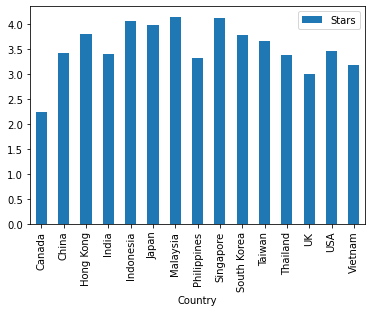

In [13]:
final.plot(kind='bar');

In [14]:
crosstab = pd.crosstab(df1['Stars'], df['Country'])

crosstab

Country,Australia,Bangladesh,Brazil,Cambodia,Canada,China,Colombia,Dubai,Estonia,Fiji,Finland,Germany,Ghana,Holland,Hong Kong,Hungary,India,Indonesia,Japan,Malaysia,Mexico,Myanmar,Nepal,Netherlands,Nigeria,Pakistan,Philippines,Poland,Sarawak,Singapore,South Korea,Sweden,Taiwan,Thailand,UK,USA,United States,Vietnam
Stars,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000,0,0,0,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,4,0,1,7,0,1
0.100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0.250,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,2,0,0
0.500,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0,2,1,1,0,1
0.750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1.000,1,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,1,0,0,1,0,0,0,0,2,0,6,2,2,2,0,1
1.100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1.250,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,3


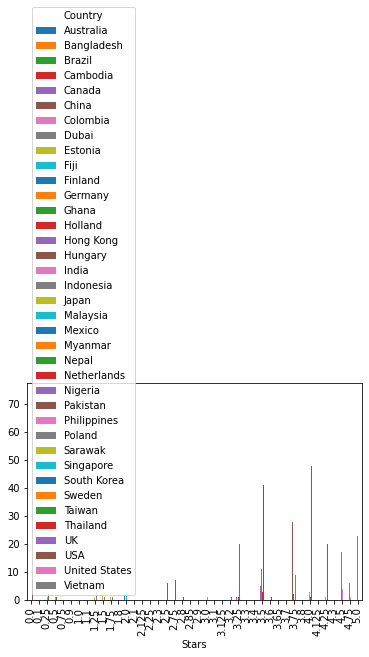

In [15]:
crosstab.plot(kind='bar');

In [16]:
df1['Stars'].mean()

3.654675979821498

In [18]:
df1['Country'].value_counts()

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Poland             4
Holland            4
Fiji               4
Dubai              3
Finland            3
Sarawak            3
Sweden             3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

In [19]:
names = ['Nigeria', 'United States', 'Ghana', 'Estonia', 'Dubai', 'Finland', 'Sarawak', 
         'Sweden', 'Fiji', 'Poland', 'Holland', 'Cambodia', 'Brazil', 'Colombia', 
         'Bangladesh', 'Hungary', 'Pakistan', 'Nepal', 'Myanmar', 'Netherlands', 
         'Australia', 'Mexico', 'Germany']

df_new = crosstab.drop(names, axis=1)

df_new.head()

Country,Canada,China,Hong Kong,India,Indonesia,Japan,Malaysia,Philippines,Singapore,South Korea,Taiwan,Thailand,UK,USA,Vietnam
Stars,,,,,,,,,,,,,,,
0.00,4,6,0,0,0,1,0,0,0,2,4,0,1,7,1
0.10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
0.25,1,2,0,0,0,2,0,1,0,0,1,1,0,2,0
0.50,2,2,1,0,0,0,0,1,0,1,0,2,1,1,1
0.75,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


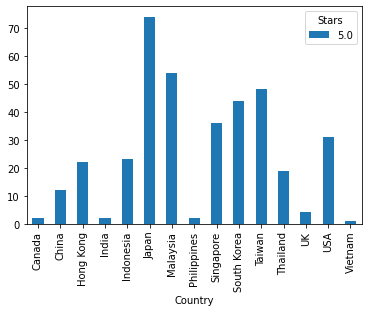

In [24]:
higher_rankings = df_new.tail(1).T

higher_rankings.plot(kind='bar');

In [25]:
df_new.tail(20)

Country,Canada,China,Hong Kong,India,Indonesia,Japan,Malaysia,Philippines,Singapore,South Korea,Taiwan,Thailand,UK,USA,Vietnam
Stars,,,,,,,,,,,,,,,
3.000,6,13,11,1,5,21,5,6,4,12,8,16,10,23,12
3.100,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
3.125,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3.200,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3.250,1,8,5,3,6,14,8,5,3,17,20,17,7,26,11
3.300,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3.400,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3.500,5,22,11,4,9,30,19,2,14,46,16,41,7,46,21
3.600,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Where is the best Ramen?  The first place that popped into my head? Japan.  Several people I talked with had the same inclination.  The data I am about to show you will prove this to only be somewhat true.  While you may find the highest quantity of top rated ramen in the world to be in Japan, the most consistent seems to suprisingly be Malaysia. Side note, don't ever eat ramen in Canada.  Malaysia, Singapore, Indonesia only countries to average 4+ on a star rating of 0-5. While Japan, Malaysia and Taiwan all had 45+ 5 star rated ramens.